In [4]:
import pandas as pd
import numpy as np

In [5]:
# Model 3:
# Impute gender and age
# Use session - action detail (based on result in previous model, action detail seems to outperform action and action_type)

In [6]:
# Load the data into DataFrames
train_users = pd.read_csv('./data/train_users_2.csv')
test_users = pd.read_csv('./data/test_users.csv')

In [7]:
# Inspect data 
len(train_users.id.unique()), len(test_users.id.unique()), train_users.shape, test_users.shape

(213451, 62096, (213451, 16), (62096, 15))

In [8]:
# Replace null in Gender field
train_users.gender.replace('-unknown-', np.nan, inplace=True)
test_users.gender.replace('-unknown-', np.nan, inplace=True)

In [9]:
train_users.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                      95688
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [10]:
test_users.isnull().sum()

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                     33792
age                        28876
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked       20
signup_app                     0
first_device_type              0
first_browser                  0
dtype: int64

In [11]:
train_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [12]:
train_users.date_first_booking.max()

'2015-06-29'

In [13]:
train_users.gender.value_counts()

FEMALE    63041
MALE      54440
OTHER       282
Name: gender, dtype: int64

In [14]:
# Merge train and test users
users = pd.concat((train_users, test_users), axis=0)

In [15]:
# Change Dates columns to Python Date format
users['date_account_created'] = pd.to_datetime(users['date_account_created'], format='%Y-%m-%d')
users['timestamp_first_active'] = pd.to_datetime(users['timestamp_first_active'], format='%Y%m%d%H%M%S')
#users['date_account_created'].fillna(df_all.timestamp_first_active, inplace=True)

In [16]:
# Nullify outliers (Age)
users.loc[users['age'] > 90,'age'] = np.NaN
users.loc[users['age'] < 15,'age'] = np.NaN

print len(users[users['age'] > 90])
print len(users[users['age'] < 15])
print len(users[users['age'].isnull()])

0
0
119853


In [17]:
users = users.fillna({'age':-1}, inplace=True)

In [18]:
# Extract Date Features
import datetime as dt
users['day_account_created'] = users['date_account_created'].dt.weekday
users['month_account_created'] = users['date_account_created'].dt.month
users['quarter_account_created'] = users['date_account_created'].dt.quarter
users['year_account_created'] = users['date_account_created'].dt.year
users['hour_first_active'] = users['timestamp_first_active'].dt.hour
users['day_first_active'] = users['timestamp_first_active'].dt.weekday
users['month_first_active'] = users['timestamp_first_active'].dt.month
users['quarter_first_active'] = users['timestamp_first_active'].dt.quarter
users['year_first_active'] = users['timestamp_first_active'].dt.year
users['created_less_active'] = (users['date_account_created'] - users['timestamp_first_active']).dt.days

In [19]:
users.shape

(275547, 26)

In [26]:
t_users = users.copy()
t_users = t_users.set_index('id')

cat_features = ['affiliate_channel',
 'affiliate_provider',
 'first_affiliate_tracked',
 'first_browser',
 'first_device_type',
 'gender',
 'language',
 'signup_app',
 'signup_flow',
 'signup_method']
num_features = ['day_account_created',
 'month_account_created',
 'quarter_account_created',
 'year_account_created',
 'hour_first_active',
 'day_first_active',
 'month_first_active',
 'quarter_first_active',
 'year_first_active',
 'created_less_active']
target = ['country_destination']

In [27]:
# Impute Gender
# Predict gender using existing data
nogender_cat_features = ['affiliate_channel',
 'affiliate_provider',
 'first_affiliate_tracked',
 'first_browser',
 'first_device_type',
 'language',
 'signup_app',
 'signup_flow',
 'signup_method']
nogender_target = ['gender']

In [28]:
nogender_cat_features, nogender_target

(['affiliate_channel',
  'affiliate_provider',
  'first_affiliate_tracked',
  'first_browser',
  'first_device_type',
  'language',
  'signup_app',
  'signup_flow',
  'signup_method'],
 ['gender'])

In [29]:
t_users.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,...,day_account_created,month_account_created,quarter_account_created,year_account_created,hour_first_active,day_first_active,month_first_active,quarter_first_active,year_first_active,created_less_active
id,,,,,,,,,,,,,,,,,,,,,
gxn3p5htnn,direct,direct,-1.0,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,NaN,...,0,6,2,2010,4,3,3,1,2009,465
820tgsjxq7,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,...,2,5,2,2011,17,5,5,2,2009,731
4ft3gnwmtx,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,...,1,9,3,2010,23,1,6,2,2009,475
bjjt8pjhuk,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,...,0,12,4,2011,6,5,10,4,2009,764
87mebub9p4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,NaN,...,1,9,3,2010,6,1,12,4,2009,279


In [32]:
#One-hot-encoding
encode_users = pd.get_dummies(t_users[nogender_cat_features])
df_users = pd.merge(t_users[num_features], encode_users, how='inner', left_index=True, right_index=True)

In [33]:
df_users.shape

(275547, 142)

In [37]:
df_users = pd.merge(df_users, t_users[nogender_target], how='inner', left_index=True, right_index=True)

In [39]:
df_users.shape

(275547, 143)

In [40]:
gender_X = df_users[df_users['gender'].isnull()==False]

In [42]:
gender_X_pred = df_users[df_users['gender'].isnull()]

In [43]:
gender_X.shape, gender_X_pred.shape, df_users.shape

((146067, 143), (129480, 143), (275547, 143))

In [46]:
gender_y = gender_X.gender

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
gender_le_y = le.fit_transform(gender_y)

In [48]:
gender_X = gender_X.drop('gender', axis=1, inplace=False)

In [ ]:
#LabelEncoder

In [55]:
# Using Logistics regression to predict Gender
from sklearn.linear_model import LogisticRegression
#glm = LogisticRegression(solver='newton-cg',multi_class='multinomial')
glm = LogisticRegression()
glm.fit(gender_X, gender_le_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [58]:
gender_X_pred = gender_X_pred.drop('gender', axis=1, inplace=False)

In [59]:
gender_le_y_pred = glm.predict(gender_X_pred)

In [61]:
np.bincount(gender_le_y_pred)

array([90782, 38698])

In [68]:
le.inverse_transform(gender_le_y_pred)

array(['MALE', 'MALE', 'FEMALE', ..., 'MALE', 'FEMALE', 'FEMALE'], dtype=object)

In [69]:
gender_X_pred['gender'] = le.inverse_transform(gender_le_y_pred)

In [71]:
gender_X_pred.head()

,day_account_created,month_account_created,quarter_account_created,year_account_created,hour_first_active,day_first_active,month_first_active,quarter_first_active,year_first_active,created_less_active,...,language_zh,signup_app_Android,signup_app_Moweb,signup_app_Web,signup_app_iOS,signup_method_basic,signup_method_facebook,signup_method_google,signup_method_weibo,gender
id,,,,,,,,,,,,,,,,,,,,,
gxn3p5htnn,0,6,2,2010,4,3,3,1,2009,465,...,0,0,0,1,0,0,1,0,0,MALE
87mebub9p4,1,9,3,2010,6,1,12,4,2009,279,...,0,0,0,1,0,1,0,0,0,MALE
osr2jwljor,4,1,1,2010,21,4,1,1,2010,-1,...,0,0,0,1,0,1,0,0,0,FEMALE
6uh8zyj2gn,0,1,1,2010,2,0,1,1,2010,-1,...,0,0,0,1,0,1,0,0,0,FEMALE
k6np330cm1,1,1,1,2010,6,1,1,1,2010,-1,...,0,0,0,1,0,1,0,0,0,FEMALE


In [72]:
# Merge predicted gender bact to the df_users dataframe
gender_X_pred.shape, t_users.shape

((129480, 143), (275547, 25))

In [73]:
t_users.gender.value_counts()

FEMALE    77524
MALE      68209
OTHER       334
Name: gender, dtype: int64

In [75]:
t_users.gender.isnull().sum()

129480

In [96]:
gender_X_pred['gender'].head()

id
gxn3p5htnn      MALE
87mebub9p4      MALE
osr2jwljor    FEMALE
6uh8zyj2gn    FEMALE
k6np330cm1    FEMALE
Name: gender, dtype: object

In [89]:
gender_X_pred['gender'].index

Index([u'gxn3p5htnn', u'87mebub9p4', u'osr2jwljor', u'6uh8zyj2gn',
       u'k6np330cm1', u'2dwbwkx056', u'frhre329au', u'cxlg85pg1r',
       u'qdubonn3uk', u'80f7dwscrn',
       ...
       u'gpusl6ppgf', u'3ptlvdxss9', u'kofaz2kh70', u'u7lv3glv6y',
       u'wcw7xggeqp', u'8yvhec201j', u'cv0na2lf5a', u'zp8xfonng8',
       u'fa6260ziny', u'87k0fy4ugm'],
      dtype='object', name=u'id', length=129480)

In [94]:
impute_gender_df = pd.DataFrame(gender_X_pred['gender'].values, columns=['predicted_gender'], index=gender_X_pred['gender'].index)

In [95]:
impute_gender_df.head()

,predicted_gender
id,
gxn3p5htnn,MALE
87mebub9p4,MALE
osr2jwljor,FEMALE
6uh8zyj2gn,FEMALE
k6np330cm1,FEMALE


In [97]:
t_users = pd.merge(t_users, impute_gender_df, how='left', left_index='True', right_index='True')

In [98]:
t_users.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,...,month_account_created,quarter_account_created,year_account_created,hour_first_active,day_first_active,month_first_active,quarter_first_active,year_first_active,created_less_active,predicted_gender
id,,,,,,,,,,,,,,,,,,,,,
gxn3p5htnn,direct,direct,-1.0,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,NaN,...,6,2,2010,4,3,3,1,2009,465,MALE
820tgsjxq7,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,...,5,2,2011,17,5,5,2,2009,731,NaN
4ft3gnwmtx,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,...,9,3,2010,23,1,6,2,2009,475,NaN
bjjt8pjhuk,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,...,12,4,2011,6,5,10,4,2009,764,NaN
87mebub9p4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,NaN,...,9,3,2010,6,1,12,4,2009,279,MALE


In [110]:
t_users.loc[t_users.gender.isnull(),'gender'] = t_users['predicted_gender']

In [112]:
t_users.gender.isnull().sum()

0

In [114]:
t_users.shape

(275547, 26)

In [115]:
encode_users = pd.get_dummies(t_users[cat_features])

In [116]:
encode_users.shape, t_users[num_features].shape

((275547, 135), (275547, 10))

In [117]:
df_users = pd.merge(t_users[num_features], encode_users, how='inner', left_index=True, right_index=True)

In [118]:
df_users.shape

(275547, 145)

In [120]:
# Join/Merge with session data
user_devices = pd.read_csv('./data/user_devices.csv')
user_session = pd.read_csv('./data/user_session_detail.csv')

In [121]:
user_devices.shape, user_session.shape, df_users.shape

((135483, 15), (135478, 156), (275547, 145))

In [122]:
df_users = df_users.reset_index()
all_users = pd.merge(df_users, user_devices, how='left', left_on='id', right_on='user_id')
all_users = pd.merge(all_users, user_session, how='left', left_on='id', right_on='user_id')

In [123]:
all_users.shape

(275547, 317)

In [124]:
destination = t_users['country_destination'].reset_index()

In [125]:
all_users = pd.merge(all_users, destination, how='inner', on='id')

In [126]:
all_users = all_users.drop(['user_id_x','user_id_y'], axis=1)

In [127]:
# Split train and test data
df_test = all_users[all_users['country_destination'].isnull()]
df_train = all_users[all_users['country_destination'].isnull()==False]

In [129]:
df_test.shape, df_train.shape

((62096, 316), (213451, 316))

In [130]:
df_train = df_train.fillna(0)
df_test = df_test.fillna(0)

In [131]:
from sklearn.preprocessing import LabelEncoder
labels = df_train['country_destination']
le = LabelEncoder()
y = le.fit_transform(labels)
X = df_train.drop('country_destination', axis=1, inplace=False)

In [132]:
X.shape, y.shape

((213451, 315), (213451,))

In [133]:
idtrain = df_train['id']
X = X.drop('id', axis=1, inplace=False)

In [134]:
# Model 2
# Grid Search - Used to find best combination of parameters
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Performing grid search

# Skip Grid search for time saving
final_model = XGBClassifier(
        learning_rate =0.1,
        n_estimators=25,
        max_depth=3,
        objective='multi:softprob', 
        subsample=0.5, 
        colsample_bytree=0.5, 
        seed=0)
final_model.fit(X,y)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.5,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=25, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.5)

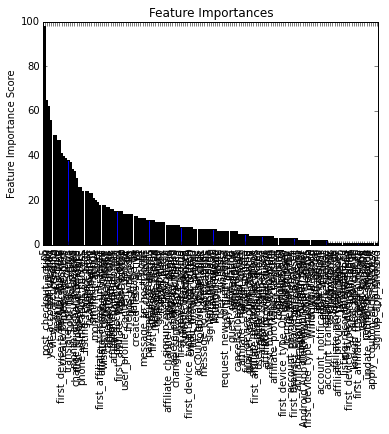

In [135]:
import matplotlib.pyplot as plt
%matplotlib inline
feat_imp = pd.Series(final_model.booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [136]:
feat_imp[:20]

p5                               98
post_checkout_action             65
signup_flow                      62
year_account_created             56
view_search_results              49
pending                          49
year_first_active                47
signup_app_Web                   47
first_device_type_Mac Desktop    41
create_phone_numbers             40
message_post                     39
translate_listing_reviews        38
hour_first_active                37
your_trips                       34
month_account_created            33
change_trip_characteristics      30
first_browser_-unknown-          26
gender_FEMALE                    26
phone_verification_success       24
listing_reviews_page             24
dtype: int64

In [137]:
#Prepare data for prediction
df_test = df_test.drop('country_destination', axis=1, inplace=False)
id_test = df_test['id']
X_test = df_test.drop('id', axis=1, inplace=False)
X_test.shape

(62096, 314)

In [138]:
# Make predictions
y_pred = final_model.predict_proba(X_test)

In [139]:
id_test = id_test.reset_index()
ids_test = id_test.id.values

In [140]:
#Taking the 5 classes with highest probabilities
ids = []  #list of ids
cts = []  #list of countries
for i in range(len(ids_test)):
    idx = ids_test[i]
    ids += [idx] * 5
    cts += le.inverse_transform(np.argsort(y_pred[i])[::-1])[:5].tolist()

In [141]:
len(ids), len(cts), ids[:10], cts[:10]

(310480,
 310480,
 ['5uwns89zht',
  '5uwns89zht',
  '5uwns89zht',
  '5uwns89zht',
  '5uwns89zht',
  'jtl0dijy2j',
  'jtl0dijy2j',
  'jtl0dijy2j',
  'jtl0dijy2j',
  'jtl0dijy2j'],
 ['NDF', 'US', 'other', 'FR', 'IT', 'NDF', 'US', 'other', 'FR', 'IT'])

In [142]:
#Generate submission
print("Outputting final results...")
sub = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])
sub.to_csv('./data/submission-2016-10-30.csv', index=False)

Outputting final results...


In [143]:
sub.shape, df_test.shape

((310480, 2), (62096, 315))